In [3]:
import pandas as pd


df=pd.read_csv('Alcohol_Sales.csv')
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [9]:
df.rename(columns={"DATE":"Date","S4248SM144NCEN":"Sales"},inplace=True)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [15]:
df.isnull().sum()

Date     0
Sales    0
dtype: int64

In [17]:
df.describe()

,Date,Sales
count,325,325.000000
mean,2005-07-01 13:35:15.692307712,7886.400000
min,1992-01-01 00:00:00,3031.000000
25%,1998-10-01 00:00:00,5231.000000
50%,2005-07-01 00:00:00,7481.000000
75%,2012-04-01 00:00:00,9977.000000
max,2019-01-01 00:00:00,15504.000000
std,NaN,2914.269061


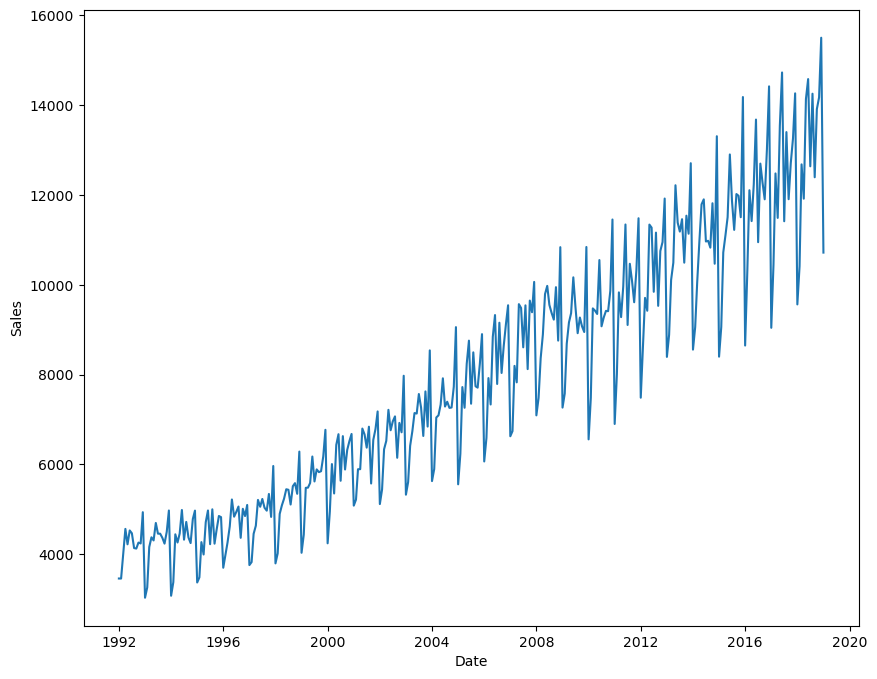

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

sns.lineplot(x="Date",y="Sales",data=df)

plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller

first_difference=df["Sales"].diff()[1:]
result=adfuller(first_difference)
print(f'p-value:{result[1]}')



p-value:0.00034082849211699906


In [45]:
df.head(16)

,Date,Sales,first_difference
0,1992-01-01,3459,NaN
1,1992-02-01,3458,-1.0
2,1992-03-01,4002,544.0
3,1992-04-01,4564,562.0
4,1992-05-01,4221,-343.0
5,1992-06-01,4529,308.0
6,1992-07-01,4466,-63.0
7,1992-08-01,4137,-329.0
8,1992-09-01,4126,-11.0
9,1992-10-01,4259,133.0


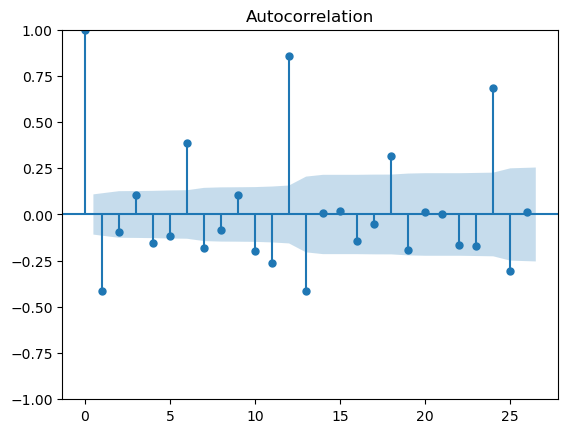

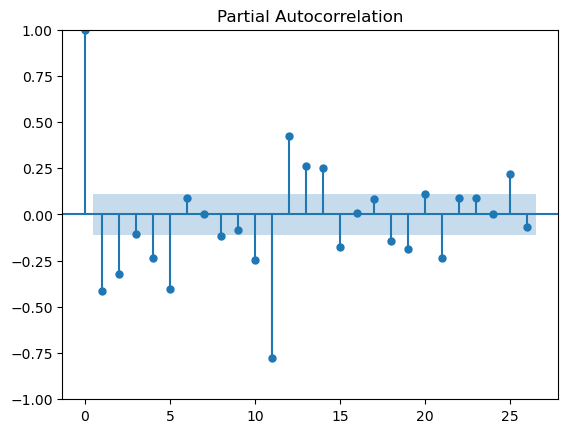

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting acf and pcf graphs to check if the graph is consistent or not

acf_original = plot_acf(first_difference)

pacf_original = plot_pacf(first_difference)

In [49]:
df.head(22)

,Date,Sales,first_difference
0,1992-01-01,3459,NaN
1,1992-02-01,3458,-1.0
2,1992-03-01,4002,544.0
3,1992-04-01,4564,562.0
4,1992-05-01,4221,-343.0
5,1992-06-01,4529,308.0
6,1992-07-01,4466,-63.0
7,1992-08-01,4137,-329.0
8,1992-09-01,4126,-11.0
9,1992-10-01,4259,133.0


In [51]:
num_split=int(df["Sales"].shape[0]*0.8)

train_set=df["Sales"].iloc[:num_split]

test_set=df['Sales'].iloc[num_split:]

In [57]:
import pmdarima as pm
model = pm.auto_arima(train_set, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)

C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5361.040, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5077.375, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.23 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.30 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,6)(0,0,0)[0]             : AIC=inf, Time=0.58 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,7)(0,0,0)[0]             : AIC=inf, Time=0.70 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,8)(0,0,0)[0]             : AIC=inf, Time=0.80 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,9)(0,0,0)[0]             : AIC=inf, Time=0.81 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,10)(0,0,0)[0]             : AIC=inf, Time=1.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4381.512, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4272.293, Time=0.12 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4270.358, Time=0.18 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4271.132, Time=0.23 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.25 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=0.29 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,6)(0,0,0)[0]             : AIC=inf, Time=0.53 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,7)(0,0,0)[0]             : AIC=inf, Time=0.60 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,8)(0,0,0)[0]             : AIC=inf, Time=0.74 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,9)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4270.968, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.28 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=4233.288, Time=0.35 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=0.45 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,6)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,7)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,8)(0,0,0)[0]             : AIC=4236.470, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4271.317, Time=0.24 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.30 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.38 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=inf, Time=0.44 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,6)(0,0,0)[0]             : AIC=4262.443, Time=0.58 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,7)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4295.141, Time=0.30 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=0.42 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=0.54 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,6)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4296.182, Time=0.34 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=0.53 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,0,1)(0,0,0)[0]             : AIC=4266.159, Time=0.23 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,0,3)(0,0,0)[0]             : AIC=inf, Time=0.49 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,0,4)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,0,1)(0,0,0)[0]             : AIC=4250.849, Time=0.51 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(8,0,1)(0,0,0)[0]             : AIC=4246.631, Time=0.64 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(8,0,2)(0,0,0)[0]             : AIC=4216.251, Time=0.63 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(9,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(9,0,1)(0,0,0)[0]             : AIC=4250.283, Time=0.68 sec


C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(10,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(8,0,2)(0,0,0)[0]          
Total fit time: 26.612 seconds


In [61]:
from statsmodels.tsa.arima.model import ARIMA

# here the best arima model is (8,0,2)

model= ARIMA(train_set, order=(8,0,2))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  260
Model:                 ARIMA(8, 0, 2)   Log Likelihood               -2097.457
Date:                Fri, 17 Jan 2025   AIC                           4218.915
Time:                        12:38:20   BIC                           4261.643
Sample:                             0   HQIC                          4236.092
                                - 260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6887.3327   1.08e-08   6.37e+11      0.000    6887.333    6887.333
ar.L1          0.2274      0.075      3.048      0.002       0.081       0.374
ar.L2         -0.6933      0.092     -7.513      0.0

C:\Users\anish\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


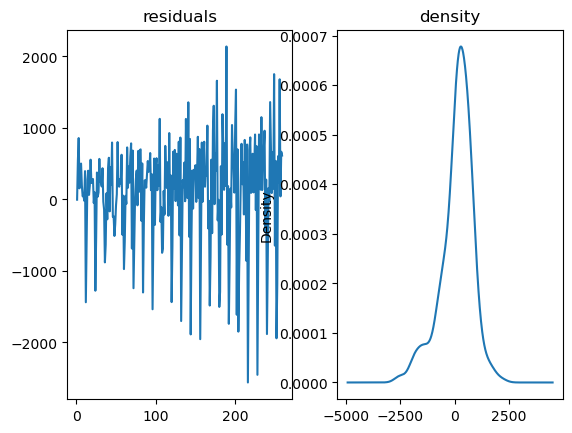

In [63]:
# checking residuals and density to see if we need more data to train the Model

import matplotlib.pyplot as plt
residuals=model_fit.resid[1:]
fig, ax =plt.subplots(1,2)
residuals.plot(title='residuals',ax=ax[0])
residuals.plot(title='density', kind='kde',ax=ax[1])
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_22420\1387700451.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]


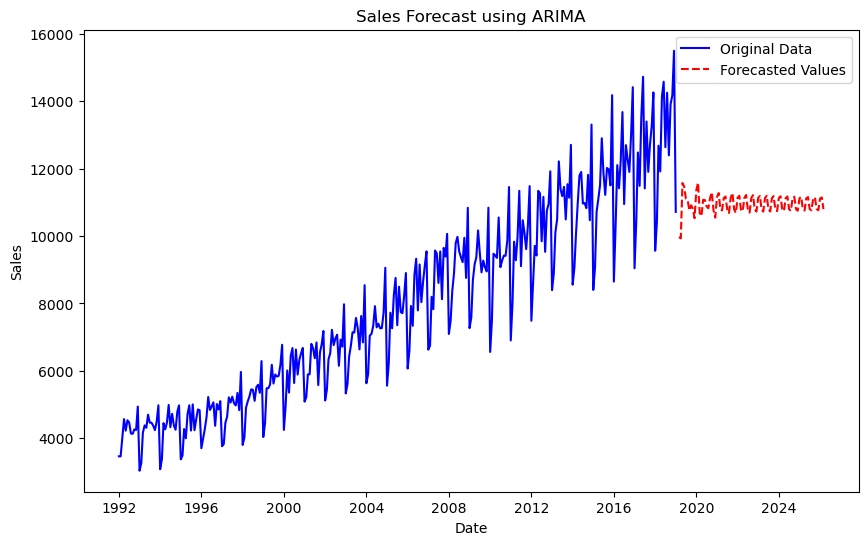

In [79]:
# Forecasting the test set length
forecast_steps = 85 
forecast_values = model_fit.forecast(steps=forecast_steps)


# Create a new index for the forecasted values
forecast_index = pd.date_range(start=df['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], label='Original Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Values', color='red', linestyle='--')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
